In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [2]:
plot_xlimin = -30
plot_xlimax = 50
x = np.linspace(plot_xlimin, plot_xlimax, 500)

mu1 = -10
sigma1 = 5

mu2 = 20
sigma2 = 8

pdf_norm1 = (norm.pdf(x, mu1, sigma1) + norm.pdf(x, mu2-10, sigma2)) / 2
pdf_norm2 = norm.pdf(x, mu2, sigma2)

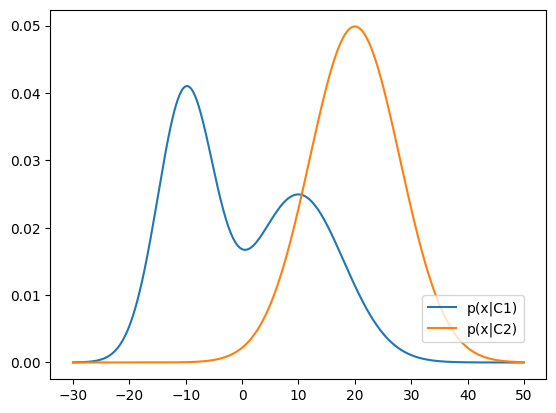

In [3]:
# graph1.27 left(p.43)
plt.plot(x, pdf_norm1, label="p(x|C1)")
plt.plot(x, pdf_norm2, label="p(x|C2)")

plt.legend(loc = (0.75, 0.1) )
plt.show()

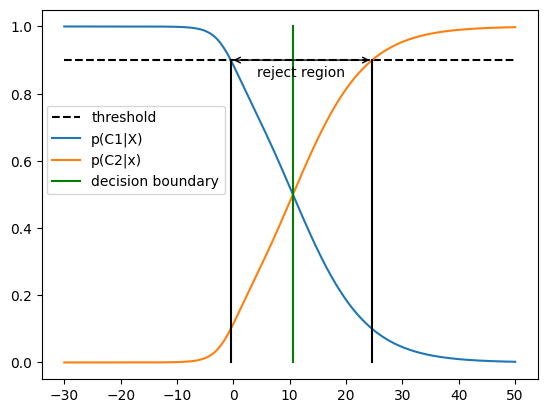

In [4]:
# graph1.26 right(p.41)
# graph1.27 right(p.43)
p_C1 = 0.5
p_C2 = 0.5

threshold = 0.9
plt.plot([plot_xlimin, plot_xlimax], [threshold, threshold], linestyle="--", color="black", label="threshold")

p_x = pdf_norm1 * p_C1 + pdf_norm2 * p_C2
pdf_norm1 = (pdf_norm1 * p_C1) / p_x
pdf_norm2 = (pdf_norm2 * p_C2) / p_x
plt.plot(x, pdf_norm1, label="p(C1|X)")
plt.plot(x, pdf_norm2, label="p(C2|x)")

pdf_dif = np.abs(pdf_norm1 - pdf_norm2)
idx_cross = np.argmin(pdf_dif)
x_line = x[idx_cross]
plt.plot([x_line, x_line], [0, 1], linestyle="-", color="green", label="decision boundary")

decision_dif1 = np.abs(pdf_norm1 - threshold)
decision_dif2 = np.abs(pdf_norm2 - threshold)
decision_cross = [np.argmin(decision_dif1), np.argmin(decision_dif2)]
decision_line = [x[decision_cross[0]], x[decision_cross[1]]]
plt.plot([decision_line[0], decision_line[0]], [0, threshold], linestyle="-", color="black")
plt.plot([decision_line[1], decision_line[1]], [0, threshold], linestyle="-", color="black")
plt.annotate('', xy=(decision_line[0], threshold), xytext=(decision_line[1], threshold), arrowprops=dict(arrowstyle='<->', color='black'))
plt.text((decision_line[0] + decision_line[1]) / 2, threshold-0.05, 'reject region', ha='center')

plt.legend(loc = (0.01, 0.5) )
plt.show()